In [1]:
from results_utils import *
import itertools
import pickle

temp = [1.0]
reasoning = [False]
entailment = [Entail.DEBERTA]
checker = [Entail.DEBERTA]

combinations = list(itertools.product(temp, reasoning, entailment, checker))
combinations  = [Result(temp=c[0], reasoning=c[1], entailment=c[2], checker=c[3]) for c in combinations]

results = Results(combinations, dataset_path="/home/jahanpd/Jahan_Subset_v2.csv")

./data/openai_deberta_temp=1.0_reas=False_agg=original_confidence.pkl
./data/openai_deberta_temp=1.0_reas=False_checker=deberta_correctness.pkl


In [4]:
df = results.get_results_df()

In [5]:
df

,temp,reasoning,entailment,metric,correctness,part,acc,auc
0,1.0,False,Entail.DEBERTA,entropy,cluster_correct_strict,full,0.285068,0.824732
1,1.0,False,Entail.DEBERTA,entropy,cluster_correct_relaxed,full,0.326357,0.787413
2,1.0,False,Entail.DEBERTA,entropy,cluster_correct_strict,part1,0.363750,0.825208
3,1.0,False,Entail.DEBERTA,entropy,cluster_correct_relaxed,part1,0.392500,0.800778
4,1.0,False,Entail.DEBERTA,entropy,cluster_correct_strict,part2,0.220041,0.808731
5,1.0,False,Entail.DEBERTA,entropy,cluster_correct_relaxed,part2,0.271694,0.761745
6,1.0,False,Entail.DEBERTA,dentropy,cluster_correct_strict,full,0.285068,0.802363
7,1.0,False,Entail.DEBERTA,dentropy,cluster_correct_relaxed,full,0.326357,0.777904
8,1.0,False,Entail.DEBERTA,dentropy,cluster_correct_strict,part1,0.363750,0.798422
9,1.0,False,Entail.DEBERTA,dentropy,cluster_correct_relaxed,part1,0.392500,0.781189


In [6]:
# The effect of temperature
df[(df.entailment == Entail.DEBERTA) &
   (df.metric == 'entropy') &
   (df.part == 'full') &
   (df.reasoning == False) & 
   (df.correctness == "cluster_correct_strict")
   ].sort_values('temp')

,temp,reasoning,entailment,metric,correctness,part,acc,auc
0,1.0,False,Entail.DEBERTA,entropy,cluster_correct_strict,full,0.285068,0.824732


In [8]:
# The effect of correctness
df[(df.entailment == Entail.DEBERTA) &
   (df.metric == 'entropy') &
   (df.part == 'full') &
   (df.reasoning == False) &
   (df.temp == 1.0)
   ].sort_values('correctness')

,temp,reasoning,entailment,metric,correctness,part,acc,auc
1,1.0,False,Entail.DEBERTA,entropy,cluster_correct_relaxed,full,0.326357,0.787413
0,1.0,False,Entail.DEBERTA,entropy,cluster_correct_strict,full,0.285068,0.824732


In [13]:
# The effect of reasoning across parts
df[(df.entailment == Entail.GPT) &
   (df.metric == 'entropy') &
   (df.temp == 1.1) &
   (df.correctness == "cluster_correct_strict")
   ].sort_values('part')

,temp,reasoning,entailment,metric,correctness,part,acc,auc
72,1.1,False,Entail.GPT,entropy,cluster_correct_strict,full,0.472285,0.807463
90,1.1,True,Entail.GPT,entropy,cluster_correct_strict,full,0.472285,0.776348
74,1.1,False,Entail.GPT,entropy,cluster_correct_strict,part1,0.583750,0.807274
92,1.1,True,Entail.GPT,entropy,cluster_correct_strict,part1,0.583750,0.769669
76,1.1,False,Entail.GPT,entropy,cluster_correct_strict,part2,0.380165,0.777704
94,1.1,True,Entail.GPT,entropy,cluster_correct_strict,part2,0.380165,0.745924


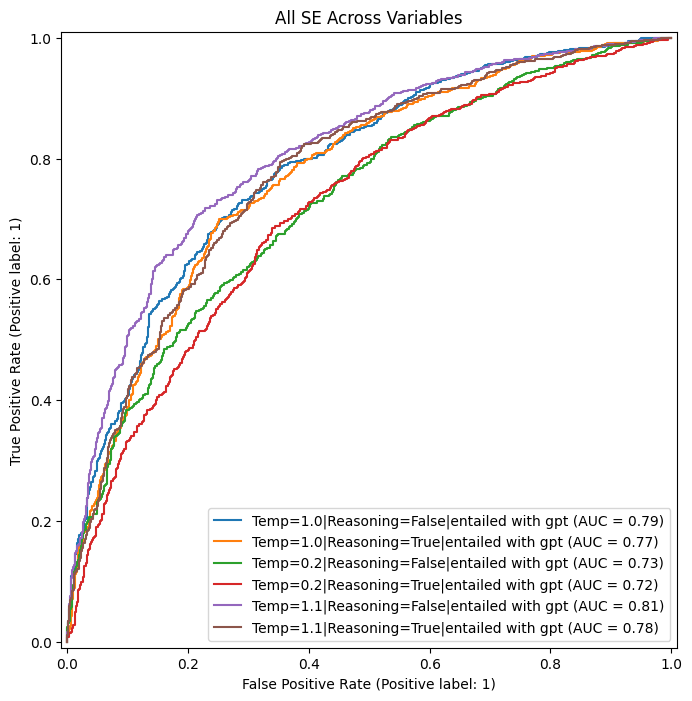

In [11]:
results.plot_aurocs_sem_ent_full_gpt()

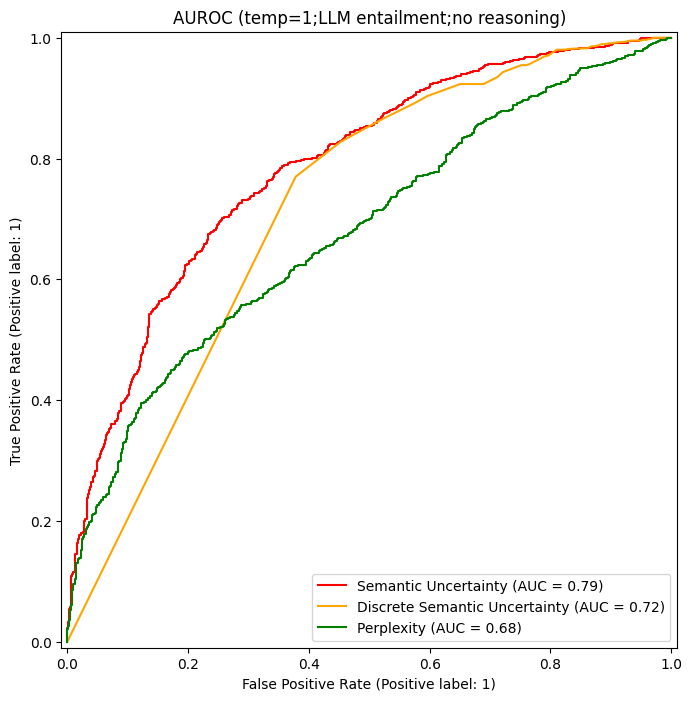

In [14]:
# temp 1 | entailment GPT | no reasoning
results.plot_aurocs_metrics_standard("AUROC (temp=1;LLM entailment;no reasoning)")